In [1]:
import sys
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import keras
import tensorflow as tf
# tensorflow moze optimalizovat proces grafu a distribuovat ho po sieti
# keras ma rychle a presne vysledky

Using TensorFlow backend.


In [2]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
cleveland = pd.read_csv('heart.csv') # nacitanie suboru

#data = cleveland[~cleveland.isin(['?'])]
data = cleveland.dropna(axis = 0) # vymaz riadky kde aspon jeden element sa rovna 0
data = data.apply(pd.to_numeric) # transformuje data na cisla

from sklearn import model_selection
#rozdelenie na input(X) a output(y)
X = np.array(data.drop(['target'],axis = 1)) # konvertuje pandas na numpy bez stlpca target 
y = np.array(data['target']) 

X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y,test_size = 0.2) # rozdeli data na trenovacie a testovacie v pome 80%:20%

from keras.utils.np_utils import to_categorical
print (y_train.shape)
print (y_train[:10])
Y_train = to_categorical(y_train, num_classes = None)# konvertuje na maticu tak ze bude mat rovnaky pocet stlpcov ako je tried,pocet riadkov sa nemeni
Y_test = to_categorical(y_test, num_classes = None)
print (Y_train.shape)
print (Y_train[:10])

(242,)
[0 1 1 0 1 1 1 1 0 0]
(242, 2)
[[1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]]


In [3]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras import backend as K


def create_model():

    model = Sequential()
    model.add(Dense(16, input_dim=13, kernel_initializer='normal', activation='relu')) 
    # vytvorí vrstvu so 16 neuronmy a 13 vstupmi, kernel_init definuje
    # náhodnu počiatocnú hodnotu váh
    # funkcia relu  generuje velmi dobré vysledky tak ako aj sigmoid
    model.add(Dense(8, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation = (tf.nn.softmax)))
    # posledna vrstva je jeden neuron s aktivacnou funkciou softmax, ktora predstavuje zovseobecnenie sigmoidu.

    adam = Adam(lr=0.001)
    # keras realizuje rychlu variantu zostupu znamu ako Stochastic Gradient Descent (SGD),okrem nej ma aj rychlejsiu variantu Adam ktora obsahuje koncept
    # momentu(rýchlostný komponent), ktorá dovoluje rýchlejsiu konvergenciu(zblizenie) za cenu viac vypoctov. je presnejsi 
    model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    # skompilovanie(zozbieranie) dat categorical_crossentropy je vhodna na predpoved viacero znaciek,pouzity optimajzer adam, accurancy predstavuje proportion
    # spravnych predpovedi s ohladom na ocakavane data (metrics sluzi na vyhodnocovanie modelu)
    return model

model = create_model()

In [4]:
history=model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=1000, batch_size=10, verbose = 2)
# ucenie matice X:údaje ako numpy pole Y: menovky ako numpy pole
# validation_data:overovacie data 
# epoch: interval
# batch_size: Počet vzoriek na aktualizáciu gradientu.
# verbose: vypis epochov 0 = ziadne

Train on 242 samples, validate on 61 samples
Epoch 1/1000
 - 1s - loss: 0.6986 - acc: 0.4793 - val_loss: 0.6629 - val_acc: 0.6230
Epoch 2/1000
 - 0s - loss: 0.6754 - acc: 0.5248 - val_loss: 0.6389 - val_acc: 0.6230
Epoch 3/1000
 - 0s - loss: 0.6585 - acc: 0.6364 - val_loss: 0.6250 - val_acc: 0.6393
Epoch 4/1000
 - 0s - loss: 0.6502 - acc: 0.6322 - val_loss: 0.6252 - val_acc: 0.6721
Epoch 5/1000
 - 0s - loss: 0.6442 - acc: 0.6364 - val_loss: 0.6150 - val_acc: 0.6557
Epoch 6/1000
 - 0s - loss: 0.6361 - acc: 0.6570 - val_loss: 0.6043 - val_acc: 0.6557
Epoch 7/1000
 - 0s - loss: 0.6494 - acc: 0.6529 - val_loss: 0.6035 - val_acc: 0.6557
Epoch 8/1000
 - 0s - loss: 0.6211 - acc: 0.7397 - val_loss: 0.5923 - val_acc: 0.6557
Epoch 9/1000
 - 0s - loss: 0.6249 - acc: 0.6860 - val_loss: 0.5902 - val_acc: 0.6885
Epoch 10/1000
 - 0s - loss: 0.6122 - acc: 0.6860 - val_loss: 0.5885 - val_acc: 0.7049
Epoch 11/1000
 - 0s - loss: 0.6133 - acc: 0.7066 - val_loss: 0.6342 - val_acc: 0.6885
Epoch 12/1000
 - 0

Epoch 96/1000
 - 0s - loss: 0.4079 - acc: 0.8264 - val_loss: 0.4321 - val_acc: 0.8197
Epoch 97/1000
 - 0s - loss: 0.4238 - acc: 0.8017 - val_loss: 0.3790 - val_acc: 0.8525
Epoch 98/1000
 - 0s - loss: 0.3743 - acc: 0.8306 - val_loss: 0.3801 - val_acc: 0.8361
Epoch 99/1000
 - 0s - loss: 0.3916 - acc: 0.8471 - val_loss: 0.4310 - val_acc: 0.8197
Epoch 100/1000
 - 0s - loss: 0.3864 - acc: 0.8223 - val_loss: 0.4383 - val_acc: 0.8197
Epoch 101/1000
 - 0s - loss: 0.4328 - acc: 0.7810 - val_loss: 0.4454 - val_acc: 0.8197
Epoch 102/1000
 - 0s - loss: 0.3880 - acc: 0.8388 - val_loss: 0.3798 - val_acc: 0.8033
Epoch 103/1000
 - 0s - loss: 0.3728 - acc: 0.8471 - val_loss: 0.3810 - val_acc: 0.8033
Epoch 104/1000
 - 0s - loss: 0.3668 - acc: 0.8636 - val_loss: 0.3956 - val_acc: 0.8361
Epoch 105/1000
 - 0s - loss: 0.4114 - acc: 0.8058 - val_loss: 0.4056 - val_acc: 0.8197
Epoch 106/1000
 - 0s - loss: 0.3854 - acc: 0.8430 - val_loss: 0.5065 - val_acc: 0.6885
Epoch 107/1000
 - 0s - loss: 0.4165 - acc: 0.80

Epoch 191/1000
 - 0s - loss: 0.3583 - acc: 0.8554 - val_loss: 0.3871 - val_acc: 0.8525
Epoch 192/1000
 - 0s - loss: 0.3953 - acc: 0.8306 - val_loss: 0.3768 - val_acc: 0.8525
Epoch 193/1000
 - 0s - loss: 0.3806 - acc: 0.8554 - val_loss: 0.4429 - val_acc: 0.8197
Epoch 194/1000
 - 0s - loss: 0.4043 - acc: 0.8099 - val_loss: 0.3699 - val_acc: 0.8689
Epoch 195/1000
 - 0s - loss: 0.3680 - acc: 0.8554 - val_loss: 0.3710 - val_acc: 0.8525
Epoch 196/1000
 - 0s - loss: 0.3606 - acc: 0.8678 - val_loss: 0.3866 - val_acc: 0.8525
Epoch 197/1000
 - 0s - loss: 0.4067 - acc: 0.8347 - val_loss: 0.3684 - val_acc: 0.8361
Epoch 198/1000
 - 0s - loss: 0.3728 - acc: 0.8471 - val_loss: 0.3706 - val_acc: 0.8197
Epoch 199/1000
 - 0s - loss: 0.3599 - acc: 0.8471 - val_loss: 0.4155 - val_acc: 0.7869
Epoch 200/1000
 - 0s - loss: 0.3839 - acc: 0.8471 - val_loss: 0.3803 - val_acc: 0.8033
Epoch 201/1000
 - 0s - loss: 0.3799 - acc: 0.8430 - val_loss: 0.3842 - val_acc: 0.8033
Epoch 202/1000
 - 0s - loss: 0.3866 - acc: 

 - 0s - loss: 0.3611 - acc: 0.8595 - val_loss: 0.3832 - val_acc: 0.8525
Epoch 286/1000
 - 0s - loss: 0.3904 - acc: 0.8182 - val_loss: 0.4290 - val_acc: 0.8033
Epoch 287/1000
 - 0s - loss: 0.3762 - acc: 0.8388 - val_loss: 0.4171 - val_acc: 0.8197
Epoch 288/1000
 - 0s - loss: 0.3887 - acc: 0.8099 - val_loss: 0.3669 - val_acc: 0.8525
Epoch 289/1000
 - 0s - loss: 0.3800 - acc: 0.8430 - val_loss: 0.4331 - val_acc: 0.8197
Epoch 290/1000
 - 0s - loss: 0.3899 - acc: 0.8223 - val_loss: 0.3772 - val_acc: 0.8525
Epoch 291/1000
 - 0s - loss: 0.3867 - acc: 0.8430 - val_loss: 0.3835 - val_acc: 0.8525
Epoch 292/1000
 - 0s - loss: 0.3722 - acc: 0.8347 - val_loss: 0.3782 - val_acc: 0.8525
Epoch 293/1000
 - 0s - loss: 0.3593 - acc: 0.8471 - val_loss: 0.4017 - val_acc: 0.7869
Epoch 294/1000
 - 0s - loss: 0.4088 - acc: 0.7975 - val_loss: 0.4385 - val_acc: 0.7377
Epoch 295/1000
 - 0s - loss: 0.3800 - acc: 0.8347 - val_loss: 0.3712 - val_acc: 0.8525
Epoch 296/1000
 - 0s - loss: 0.3630 - acc: 0.8471 - val_lo

Epoch 380/1000
 - 0s - loss: 0.3752 - acc: 0.8388 - val_loss: 0.3681 - val_acc: 0.8525
Epoch 381/1000
 - 0s - loss: 0.3835 - acc: 0.8388 - val_loss: 0.4446 - val_acc: 0.8033
Epoch 382/1000
 - 0s - loss: 0.3734 - acc: 0.8430 - val_loss: 0.3852 - val_acc: 0.8525
Epoch 383/1000
 - 0s - loss: 0.3764 - acc: 0.8347 - val_loss: 0.3732 - val_acc: 0.8525
Epoch 384/1000
 - 0s - loss: 0.3833 - acc: 0.8388 - val_loss: 0.3664 - val_acc: 0.8361
Epoch 385/1000
 - 0s - loss: 0.4091 - acc: 0.8099 - val_loss: 0.3979 - val_acc: 0.7869
Epoch 386/1000
 - 0s - loss: 0.3658 - acc: 0.8430 - val_loss: 0.3642 - val_acc: 0.8525
Epoch 387/1000
 - 0s - loss: 0.3758 - acc: 0.8430 - val_loss: 0.3735 - val_acc: 0.8361
Epoch 388/1000
 - 0s - loss: 0.3710 - acc: 0.8388 - val_loss: 0.3690 - val_acc: 0.8197
Epoch 389/1000
 - 0s - loss: 0.3621 - acc: 0.8430 - val_loss: 0.3655 - val_acc: 0.8361
Epoch 390/1000
 - 0s - loss: 0.3680 - acc: 0.8430 - val_loss: 0.3725 - val_acc: 0.8361
Epoch 391/1000
 - 0s - loss: 0.3895 - acc: 

 - 0s - loss: 0.3627 - acc: 0.8554 - val_loss: 0.3875 - val_acc: 0.8525
Epoch 475/1000
 - 0s - loss: 0.3647 - acc: 0.8512 - val_loss: 0.3677 - val_acc: 0.8361
Epoch 476/1000
 - 0s - loss: 0.3532 - acc: 0.8595 - val_loss: 0.3919 - val_acc: 0.8525
Epoch 477/1000
 - 0s - loss: 0.3773 - acc: 0.8347 - val_loss: 0.3733 - val_acc: 0.8525
Epoch 478/1000
 - 0s - loss: 0.3678 - acc: 0.8306 - val_loss: 0.3707 - val_acc: 0.8361
Epoch 479/1000
 - 0s - loss: 0.3749 - acc: 0.8636 - val_loss: 0.3816 - val_acc: 0.8525
Epoch 480/1000
 - 0s - loss: 0.3687 - acc: 0.8347 - val_loss: 0.3936 - val_acc: 0.8033
Epoch 481/1000
 - 0s - loss: 0.3937 - acc: 0.8595 - val_loss: 0.3640 - val_acc: 0.8525
Epoch 482/1000
 - 0s - loss: 0.3680 - acc: 0.8347 - val_loss: 0.3818 - val_acc: 0.8033
Epoch 483/1000
 - 0s - loss: 0.3695 - acc: 0.8512 - val_loss: 0.3698 - val_acc: 0.8525
Epoch 484/1000
 - 0s - loss: 0.3646 - acc: 0.8719 - val_loss: 0.3927 - val_acc: 0.8525
Epoch 485/1000
 - 0s - loss: 0.3930 - acc: 0.8264 - val_lo

Epoch 569/1000
 - 0s - loss: 0.3645 - acc: 0.8636 - val_loss: 0.3659 - val_acc: 0.8361
Epoch 570/1000
 - 0s - loss: 0.3535 - acc: 0.8554 - val_loss: 0.3946 - val_acc: 0.8525
Epoch 571/1000
 - 0s - loss: 0.3502 - acc: 0.8388 - val_loss: 0.3869 - val_acc: 0.7869
Epoch 572/1000
 - 0s - loss: 0.3631 - acc: 0.8430 - val_loss: 0.3666 - val_acc: 0.8525
Epoch 573/1000
 - 0s - loss: 0.3625 - acc: 0.8388 - val_loss: 0.3886 - val_acc: 0.8033
Epoch 574/1000
 - 0s - loss: 0.3751 - acc: 0.8430 - val_loss: 0.3640 - val_acc: 0.8361
Epoch 575/1000
 - 0s - loss: 0.3588 - acc: 0.8471 - val_loss: 0.3837 - val_acc: 0.8525
Epoch 576/1000
 - 0s - loss: 0.3750 - acc: 0.8347 - val_loss: 0.3612 - val_acc: 0.8361
Epoch 577/1000
 - 0s - loss: 0.3654 - acc: 0.8595 - val_loss: 0.3683 - val_acc: 0.8361
Epoch 578/1000
 - 0s - loss: 0.3699 - acc: 0.8430 - val_loss: 0.3611 - val_acc: 0.8361
Epoch 579/1000
 - 0s - loss: 0.3706 - acc: 0.8512 - val_loss: 0.3668 - val_acc: 0.8525
Epoch 580/1000
 - 0s - loss: 0.3543 - acc: 

Epoch 664/1000
 - 0s - loss: 0.3703 - acc: 0.8554 - val_loss: 0.3703 - val_acc: 0.8197
Epoch 665/1000
 - 0s - loss: 0.3713 - acc: 0.8512 - val_loss: 0.3645 - val_acc: 0.8525
Epoch 666/1000
 - 0s - loss: 0.3587 - acc: 0.8430 - val_loss: 0.3643 - val_acc: 0.8361
Epoch 667/1000
 - 0s - loss: 0.3549 - acc: 0.8471 - val_loss: 0.3789 - val_acc: 0.8033
Epoch 668/1000
 - 0s - loss: 0.3580 - acc: 0.8554 - val_loss: 0.3655 - val_acc: 0.8525
Epoch 669/1000
 - 0s - loss: 0.3583 - acc: 0.8636 - val_loss: 0.3918 - val_acc: 0.8525
Epoch 670/1000
 - 0s - loss: 0.3728 - acc: 0.8430 - val_loss: 0.3639 - val_acc: 0.8525
Epoch 671/1000
 - 0s - loss: 0.3794 - acc: 0.8306 - val_loss: 0.3710 - val_acc: 0.8033
Epoch 672/1000
 - 0s - loss: 0.3593 - acc: 0.8471 - val_loss: 0.3896 - val_acc: 0.8525
Epoch 673/1000
 - 0s - loss: 0.3759 - acc: 0.8347 - val_loss: 0.3642 - val_acc: 0.8525
Epoch 674/1000
 - 0s - loss: 0.3663 - acc: 0.8388 - val_loss: 0.3631 - val_acc: 0.8689
Epoch 675/1000
 - 0s - loss: 0.3601 - acc: 

 - 0s - loss: 0.3622 - acc: 0.8430 - val_loss: 0.3633 - val_acc: 0.8361
Epoch 759/1000
 - 0s - loss: 0.3755 - acc: 0.8512 - val_loss: 0.3729 - val_acc: 0.8033
Epoch 760/1000
 - 0s - loss: 0.3631 - acc: 0.8554 - val_loss: 0.3644 - val_acc: 0.8525
Epoch 761/1000
 - 0s - loss: 0.3538 - acc: 0.8595 - val_loss: 0.3678 - val_acc: 0.8525
Epoch 762/1000
 - 0s - loss: 0.3584 - acc: 0.8554 - val_loss: 0.3680 - val_acc: 0.8525
Epoch 763/1000
 - 0s - loss: 0.3566 - acc: 0.8512 - val_loss: 0.3747 - val_acc: 0.8525
Epoch 764/1000
 - 0s - loss: 0.3604 - acc: 0.8595 - val_loss: 0.3626 - val_acc: 0.8361
Epoch 765/1000
 - 0s - loss: 0.3580 - acc: 0.8595 - val_loss: 0.3613 - val_acc: 0.8361
Epoch 766/1000
 - 0s - loss: 0.3548 - acc: 0.8595 - val_loss: 0.3624 - val_acc: 0.8525
Epoch 767/1000
 - 0s - loss: 0.3689 - acc: 0.8471 - val_loss: 0.3629 - val_acc: 0.8361
Epoch 768/1000
 - 0s - loss: 0.3541 - acc: 0.8471 - val_loss: 0.3616 - val_acc: 0.8361
Epoch 769/1000
 - 0s - loss: 0.3584 - acc: 0.8554 - val_lo

Epoch 853/1000
 - 0s - loss: 0.3613 - acc: 0.8264 - val_loss: 0.3844 - val_acc: 0.8033
Epoch 854/1000
 - 0s - loss: 0.3704 - acc: 0.8636 - val_loss: 0.3714 - val_acc: 0.8197
Epoch 855/1000
 - 0s - loss: 0.3711 - acc: 0.8471 - val_loss: 0.3625 - val_acc: 0.8525
Epoch 856/1000
 - 0s - loss: 0.3573 - acc: 0.8554 - val_loss: 0.3718 - val_acc: 0.8033
Epoch 857/1000
 - 0s - loss: 0.3603 - acc: 0.8512 - val_loss: 0.3572 - val_acc: 0.8689
Epoch 858/1000
 - 0s - loss: 0.3544 - acc: 0.8512 - val_loss: 0.3730 - val_acc: 0.8525
Epoch 859/1000
 - 0s - loss: 0.3558 - acc: 0.8430 - val_loss: 0.3627 - val_acc: 0.8525
Epoch 860/1000
 - 0s - loss: 0.3589 - acc: 0.8512 - val_loss: 0.3583 - val_acc: 0.8525
Epoch 861/1000
 - 0s - loss: 0.3548 - acc: 0.8471 - val_loss: 0.3682 - val_acc: 0.8033
Epoch 862/1000
 - 0s - loss: 0.3699 - acc: 0.8430 - val_loss: 0.3584 - val_acc: 0.8525
Epoch 863/1000
 - 0s - loss: 0.3561 - acc: 0.8471 - val_loss: 0.3712 - val_acc: 0.8033
Epoch 864/1000
 - 0s - loss: 0.3524 - acc: 

 - 0s - loss: 0.3463 - acc: 0.8554 - val_loss: 0.3653 - val_acc: 0.8525
Epoch 948/1000
 - 0s - loss: 0.3482 - acc: 0.8471 - val_loss: 0.3500 - val_acc: 0.8525
Epoch 949/1000
 - 0s - loss: 0.3500 - acc: 0.8554 - val_loss: 0.3515 - val_acc: 0.8525
Epoch 950/1000
 - 0s - loss: 0.3635 - acc: 0.8430 - val_loss: 0.4007 - val_acc: 0.8197
Epoch 951/1000
 - 0s - loss: 0.3770 - acc: 0.8140 - val_loss: 0.3814 - val_acc: 0.8525
Epoch 952/1000
 - 0s - loss: 0.3586 - acc: 0.8595 - val_loss: 0.3589 - val_acc: 0.8525
Epoch 953/1000
 - 0s - loss: 0.3558 - acc: 0.8512 - val_loss: 0.3994 - val_acc: 0.8361
Epoch 954/1000
 - 0s - loss: 0.3624 - acc: 0.8636 - val_loss: 0.3604 - val_acc: 0.8525
Epoch 955/1000
 - 0s - loss: 0.3513 - acc: 0.8554 - val_loss: 0.3558 - val_acc: 0.8525
Epoch 956/1000
 - 0s - loss: 0.3462 - acc: 0.8595 - val_loss: 0.3575 - val_acc: 0.8361
Epoch 957/1000
 - 0s - loss: 0.3475 - acc: 0.8595 - val_loss: 0.4033 - val_acc: 0.8361
Epoch 958/1000
 - 0s - loss: 0.3727 - acc: 0.8430 - val_lo

In [5]:
scores = model.evaluate(X_train, Y_train,verbose=0)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 85.54%


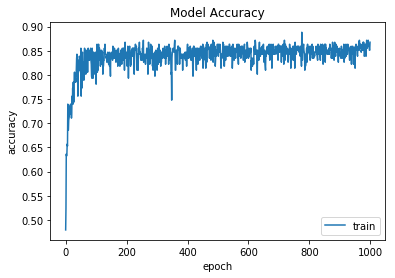

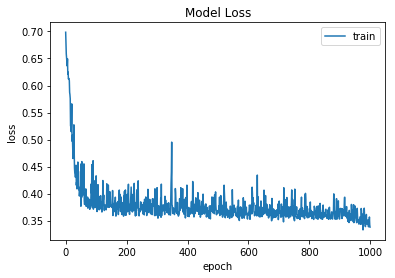

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
# Model presnost
plt.plot(history.history['acc']) #sumarizacia history presnosti trenovacich dat 
#plt.plot(history.history['val_acc']) # sumarizacia historie presnosti testovacich dat
plt.title('Model Accuracy')# nazov grafu
plt.ylabel('accuracy') # nazov y osi
plt.xlabel('epoch') # nazov x osi
plt.legend(['train', 'test']) # legenda pre trenovacia a testovacie data
plt.show()
# model chybovosti
plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()